<div style = "Text-aling: center">


# Analisis de datos masivos 
## contador SQL de Internet

# Jose Gabriel Rodriguez Rivas
# Antonio Emmanuel Martinez Rodriguez
</div>

### conectarsea la  base de datos 

In [25]:
import sqlite3
import pandas as pd
# this is a library for data vizualization
from matplotlib import pyplot as plt
# this is to say that we want our plots to be part of this page, and not opened in a new window
%matplotlib inline

In [26]:
conn = sqlite3.connect('C:/Users/Antonio/InternetSpeed.db')

In [27]:
cur = conn.cursor()

In [31]:
consulta = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10;'
cur.execute(consulta)

In [32]:
for row in cur:
    print(row)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [33]:
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)

In [34]:
columns = [member[0] for member in cur.description]

In [35]:
columns = columns[1:]
columns

['E07000026_p',
 'E07000032_p',
 'E07000224_p',
 'E07000170_p',
 'E07000105_p',
 'E07000004_p',
 'E07000200_p',
 'E09000002_p',
 'E09000003_p',
 'E08000016_p',
 'E07000027_p',
 'E07000066_p',
 'E07000084_p',
 'E07000171_p',
 'E06000022_p',
 'E06000055_p',
 'E09000004_p',
 'E08000025_p',
 'E07000129_p',
 'E06000008_p',
 'E06000009_p',
 'E07000033_p',
 'E08000001_p',
 'E07000136_p',
 'E06000028_p',
 'E06000036_p',
 'E08000032_p',
 'E07000067_p',
 'E07000143_p',
 'E09000005_p',
 'E07000068_p',
 'E06000043_p',
 'E06000023_p',
 'E07000144_p',
 'E09000006_p',
 'E07000234_p',
 'E07000095_p',
 'E07000172_p',
 'E07000117_p',
 'E08000002_p',
 'E08000033_p',
 'E07000008_p',
 'E09000007_p',
 'E07000192_p',
 'E07000106_p',
 'E07000028_p',
 'E07000069_p',
 'E06000056_p',
 'E07000130_p',
 'E07000070_p',
 'E07000078_p',
 'E07000177_p',
 'E06000049_p',
 'E06000050_p',
 'E07000034_p',
 'E07000225_p',
 'E07000005_p',
 'E07000118_p',
 'E07000048_p',
 'E09000001_p',
 'E07000071_p',
 'E07000029_p',
 'E07000

In [36]:
columns = [c.replace('_p', '') for c in columns]
# remove suffix '_d'
columns = [c.replace('_d', '') for c in columns]
# remove suffix '_u'
# columns = ??
columns = [c.replace('_u', '') for c in columns]
columns = list(set(columns))

In [37]:
columns[:10]

['E06000024',
 'E07000131',
 'E07000148',
 'E07000101',
 'E07000167',
 'E07000155',
 'E07000130',
 'E06000006',
 'E06000011',
 'E07000196']

In [38]:
area = columns[0]
print (area)

E06000024


In [39]:
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
# we have the suffixes as the keys of the dictionary
print (suffix.keys())

# we have the complete names as the values of the dictionary
print (suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E06000024')

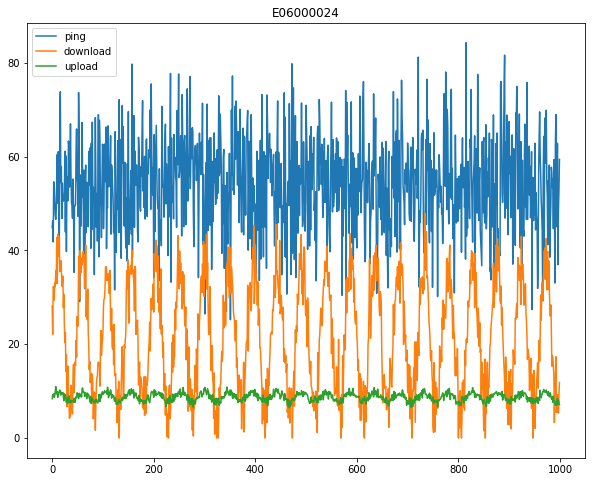

In [42]:
area = columns[0]
plt.figure(figsize=(10, 8))

for s in suffix.keys():
    consulta = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY  DateTime'.format(area, s)
    cur.execute(consulta)
    plt.plot(list(cur.fetchall()), label=suffix[s])
plt.legend()
plt.title(area)

## Manipule los datos con pandas

In [56]:
del df

NameError: name 'df' is not defined

In [57]:
new_columns= ['Area', 'Ping_promedio', 'Carga_promedio', 'Descarga_promedio']
df = pd.DataFrame(columns = new_columns)
df

,Area,Ping_promedio,Carga_promedio,Descarga_promedio


In [58]:
# this will take a while...
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        consulta ='SELECT AVG ("{}{}") FROM LA_wifi_speed_UK'.format(columns[i],s)
        cur.execute(consulta)  
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    #append the columns to the empty DataFrame
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
# visualize the head of the dataframe here
df.head()

,Area,Ping_promedio,Carga_promedio,Descarga_promedio
0,E06000024,54.099835,21.762500,8.736193
1,E07000131,51.743627,21.045307,8.310117
2,E07000148,52.250511,21.373443,8.483157
3,E07000101,51.709226,20.733028,8.317833
4,E07000167,50.988508,20.679318,8.173249


In [59]:
len(df)

326

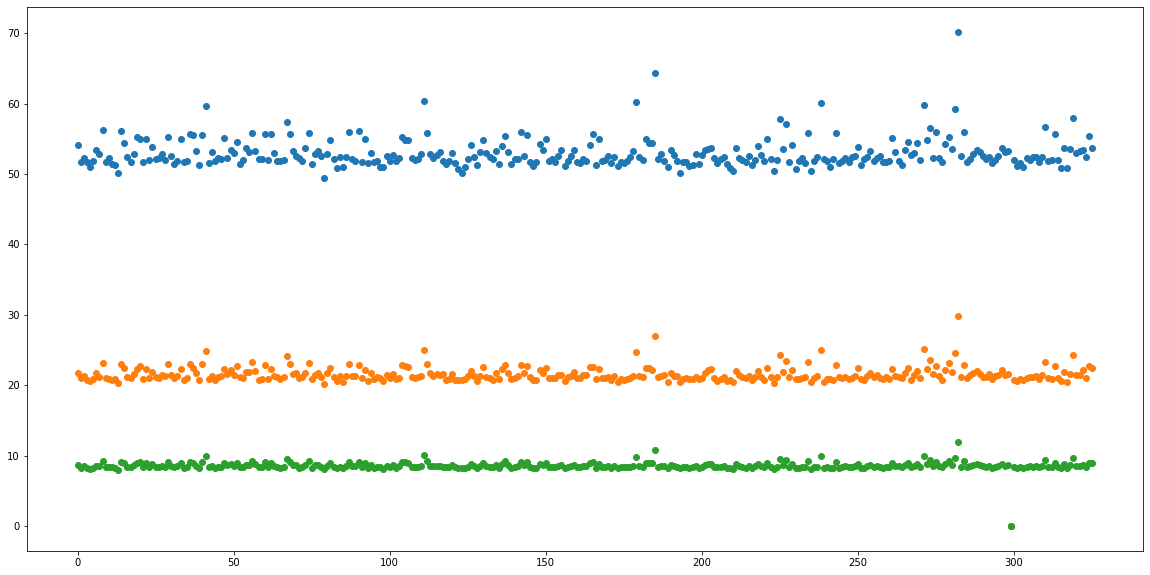

In [60]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Ping_promedio', 'Carga_promedio', 'Descarga_promedio']], 'o')

In [62]:
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

df.to_sql('average_speed',conn)

In [63]:
query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)

# print the first fetched record
print(cur.fetchone())
# print the next fetched record
print(cur.fetchone())

(0, 'E06000024', 54.09983450341699, 21.762499600931342, 8.736193287667916)
(1, 'E07000131', 51.74362664094853, 21.045306762518386, 8.310117462372588)


### Una las tablas con pandas

In [65]:
query ='SELECT * FROM LA_population LIMIT 10'
cur.execute(query)
for row in cur:
    print (row)

('Aberdeen City', 'S12000033', 222793)
('Aberdeenshire', 'S12000034', 252973)
('Adur', 'E07000223', 61182)
('Allerdale', 'E07000026', 96422)
('Amber Valley', 'E07000032', 122309)
('Angus', 'S12000041', 115978)
('Antrim and Newtownabbey', 'N09000001', 138567)
('Ards and North Down', 'N09000011', 156672)
('Argyll and Bute', 'S12000035', 88166)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693)


In [66]:
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    print(row) 
    
    k+=1

(0, 'E06000024', 54.09983450341699, 21.762499600931342, 8.736193287667916, 'North Somerset', 'E06000024', 202566)
(1, 'E07000131', 51.74362664094853, 21.045306762518386, 8.310117462372588, 'Harborough', 'E07000131', 85382)
(2, 'E07000148', 52.250511098548756, 21.373443161390096, 8.483157470561897, 'Norwich', 'E07000148', 132512)
(3, 'E07000101', 51.70922569414404, 20.73302801056292, 8.31783309790153, 'Stevenage', 'E07000101', 83957)
(4, 'E07000167', 50.98850837523955, 20.67931830149242, 8.173249116281404, 'Ryedale', 'E07000167', 51751)
(5, 'E07000155', 51.9228117915414, 20.93958799696475, 8.306206947289626, 'South Northamptonshire', 'E07000155', 85189)
(6, 'E07000130', 53.43554708392559, 21.68315204335891, 8.605938857316135, 'Charnwood', 'E07000130', 166100)
(7, 'E06000006', 52.87808994206384, 21.2387035397305, 8.480249236836627, 'Halton', 'E06000006', 125746)
(8, 'E06000011', 56.21678991447966, 23.221641766324, 9.234425008488373, 'East Riding of Yorkshire', 'E06000011', 334179)
(9, 'E